# DSM_0306
## 主題: 資料前處理: 特徵工程簡介&實作
### 專案目標: 
今天會進入實作數據科學/機器學習分析時的第一個階段: 資料前處理(Data Preprocessing)。透過特徵工程(Feature Engineering)的方式，我們會學習如何對資料進行清洗、編碼以及特徵縮放等操作，以利後續建模分析。

- 專案重點:
    -   **資料前處理**：資料探查、資料編碼、缺失值 (Missing Values)、異常值檢測 (Outliers Detection)
    -   **特徵工程**：特徵縮放、特徵選擇

- Host: Isaac
- Time: 2025/03/06
- 參考書目: 機器學習 特徵工程 : 資料科學家需學的原理與技術 by Alice Zheng, Amanda Casari

## 1. 數據分析(偏向資料科學的)在幹嘛

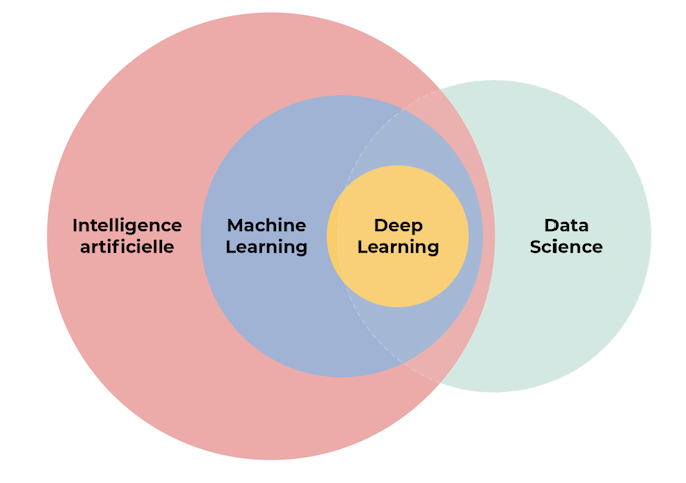

#### 資料科學（Data Science）是一門利用統計、機器學習和數據分析技術來從大量資料中提取價值的技術。



### 1.1 資料探勘/數據分析流程
在一個數據分析的專案中，我們會進行以下流程:

#### Step 0: 定義問題
我們首先要先`找到一個問題`，並且確定這個問題是可以透過數據分析來解決的。
#### Step 1: 數據收集
接著，為了要可以進行數據分析，我們會需要收集數據，這些數據可以是`結構化`的數據(例如: 資料庫、Excel檔案)，也可以是`非結構化`的數據(例如: 圖片、文字)。
會有很多的方法可以收集數據，例如: `網路爬蟲`、`API`、`問卷調查`等等。在這個階段的最後會將數據存放到`資料庫`或是`檔案`中。
#### Step 2: 數據清洗(資料預處理、資料前處理)
確認好資料來源後，需要會進行數據清洗，這個步驟是非常重要的，因為數據的品質會影響到後續的分析結果。

Garbage in, garbage out.

其中，包含以下操作:
- `資料探索(Data Exploration)`: 確認資料的型態、資料的分佈
- `資料處理(Data Processing)`: 缺失值處理、異常值處理
- `資料編碼(Data Encoding)`: One-hot encoding、Label encoding
- `特徵工程(Feature Engineering)`: 特徵縮放、特徵選擇、特徵構建
#### Step 3: 數據分析
在處理完資料後，我們會進行數據分析，這個步驟是透過統計模型、機器學習等方法來分析資料，去回答我們當初設定的問題。

在這個步驟中，我們可能會進行:
- `模型訓練(Model Training)`: 訓練模型
- `模型評估(Model Evaluation)`: 評估模型的表現
- `模型優化(Model Optimization)`: 調整模型參數

模型就像是個黑盒子(`我自己會想像成一台家用麵包機`)，我們透過輸入資料(`麵粉、雞蛋或是各種你想要的食材`)以及調整參數(`就是麵包機的各種設定`)，最終產生結果(`這個麵包也很有可能因為你的原材料好壞與設定不同而有所差異`)。`

#### Step 4: 資料視覺化
最後，將分析結果透過視覺化的方式呈現，例如: 圖表、表格等等，讓非專業人士也可以很容易的理解分析結果。




### 補充: 每個分析階段在職場上的角色對應

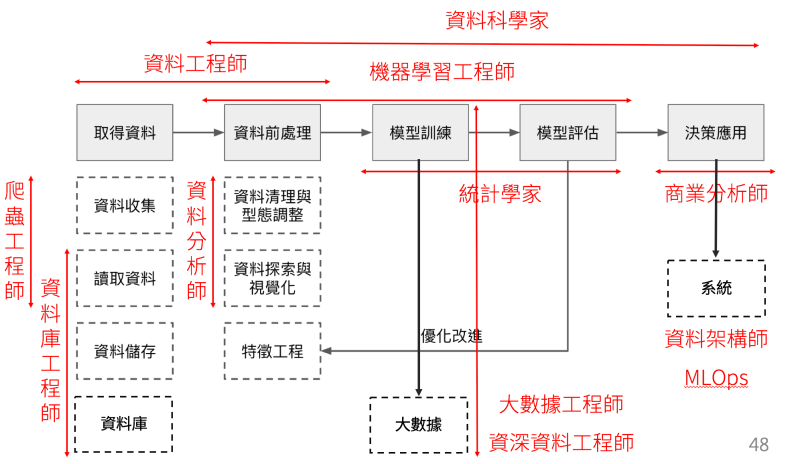

資料來源: https://tw.alphacamp.co/blog/data-scientist-data-analyst-data-engineer-in-data-team


## 2. 資料預處理(Data Preprocessing)
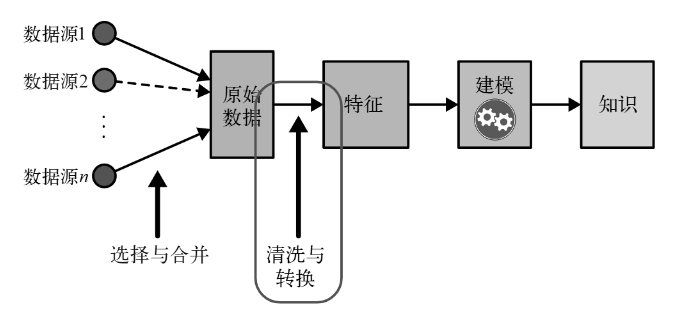

資料前處理的目的是**清理與轉換數據，使其適合用於建模**。這包含數據清理、標準化、缺失值處理等。

## 2.0 取得資料
此資料集是一份關於 Google Play Store 應用程式的資料集，包含了應用程式名稱、類別、評分、評論數量、大小、下載數量、類型、價格、目標年齡層、類型等等。

[資料來源](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

### 欄位說明

| 欄位名稱        | 說明 |
|----------------|------|
| **Application Name** | 應用程式名稱 |
| **Category** | 應用程式所屬類別 |
| **Rating** | 應用程式的整體評分（當前爬取時） |
| **Reviews** | 使用者評論數量（當前爬取時） |
| **Size** | 應用程式大小（當前爬取時） |
| **Installs** | 應用程式下載/安裝數量（當前爬取時） |
| **Type** | 應用程式類型（免費或付費） |
| **Price** | 應用程式價格（當前爬取時） |
| **Content Rating** | 目標年齡層（例如：兒童 / 21+ / 成人） |
| **Genres** | 應用程式可能屬於多個類型（例如：音樂、家庭、遊戲等） |


我們今天將透過`kagglehub`套件來取得資料集。

In [124]:
#還沒有安裝kagglehub
#!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SHI\.cache\kagglehub\datasets\lava18\google-play-store-apps\versions\6


### 2.1 資料探索(Data Exploration)
在開始任何前處理步驟前，務必深入理解你的數據，包括：
- **數據的型態（數值、類別、時間序列、文字、影像等）**
- **數據的分佈（平均值、中位數、標準差、偏態、峰度等）**
- **異常值與缺失值的情況**
- **特徵之間的相關性**

🛠 **工具**
- `df.info()`、`df.describe()`（Pandas 基礎分析）
- `sns.pairplot()`（Seaborn 可視化數據間關係）
- `df.corr()`（相關矩陣）


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 使用中文
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

# 讀取 CSV 檔案
df = pd.read_csv(f"{path}/googleplaystore.csv")

### 補充 新工具: Data Wranger
你在會在執行 df.head()、df.tail()、display(df)、print(df) 和 df 之後，在儲存格底部看到 在 Data Wrangler 中開啟 'df' 按鈕 (其中 df 是資料框架的變數名稱)。
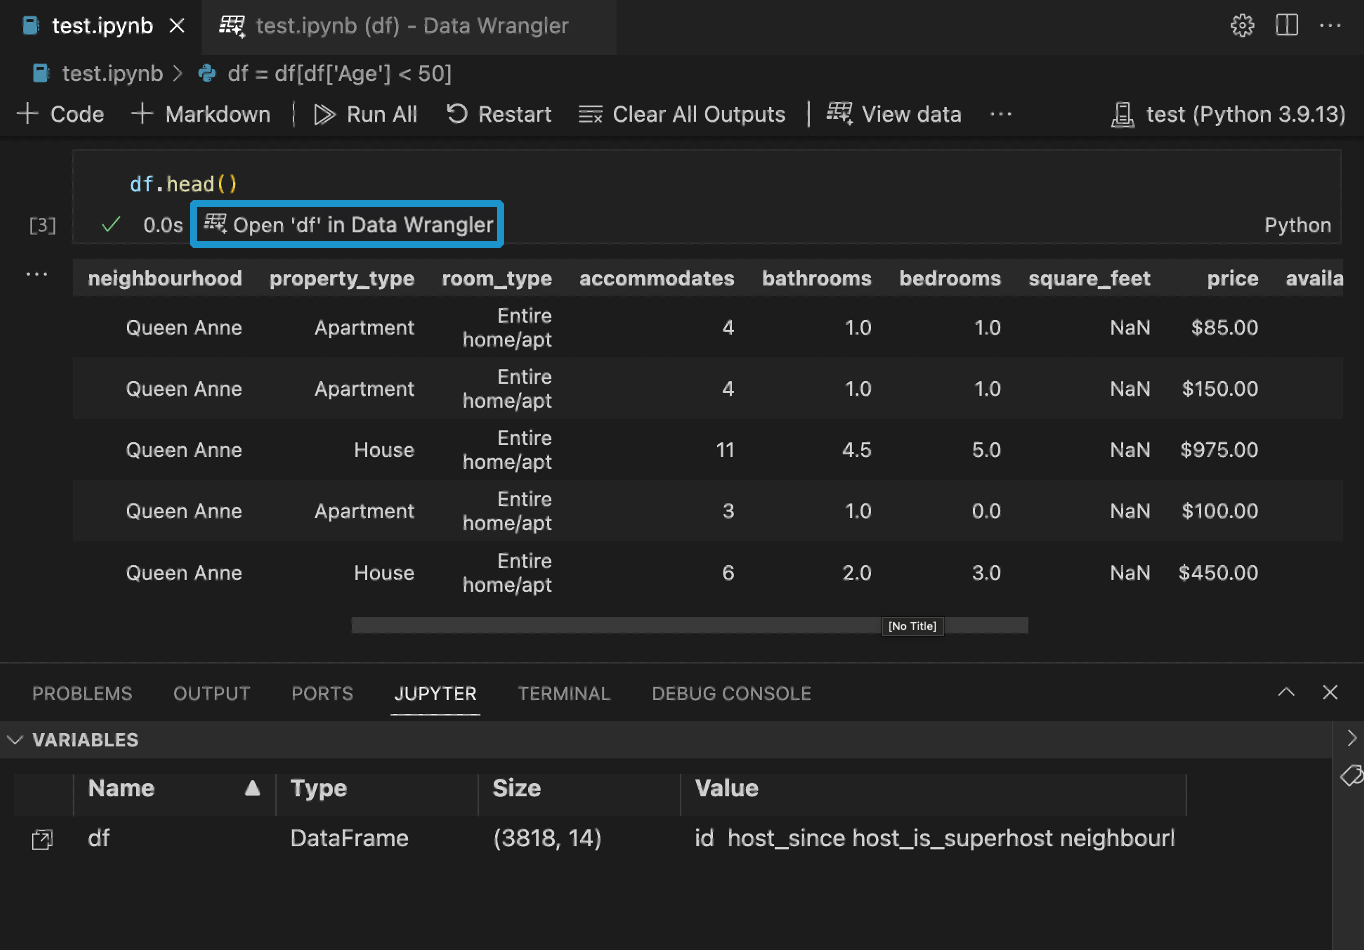

[參考資料](https://vscode.dev.org.tw/docs/datascience/data-wrangler-quick-start)

In [126]:
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 檢視數據基本資訊
print("\n 基本資訊")
print(df.info())


 基本資訊
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [128]:
# 統計摘要
print("\n 數據統計摘要")
print(df.describe(include='all'))



 數據統計摘要
           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content R

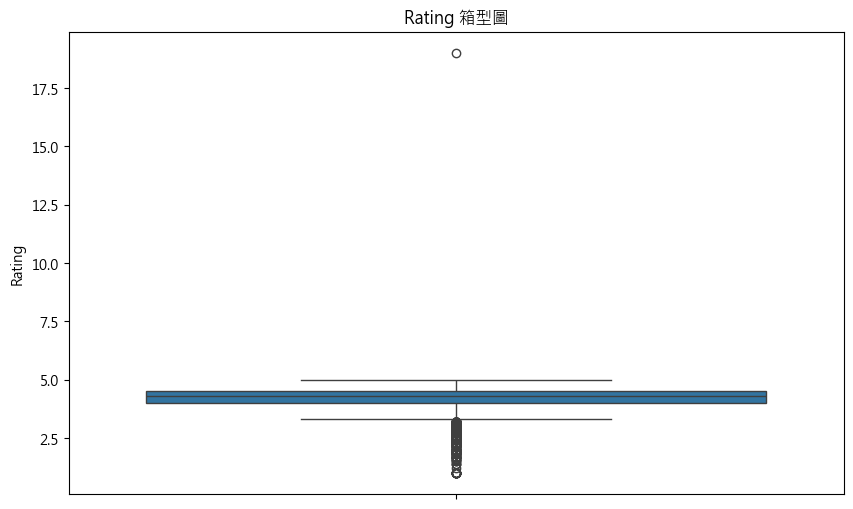

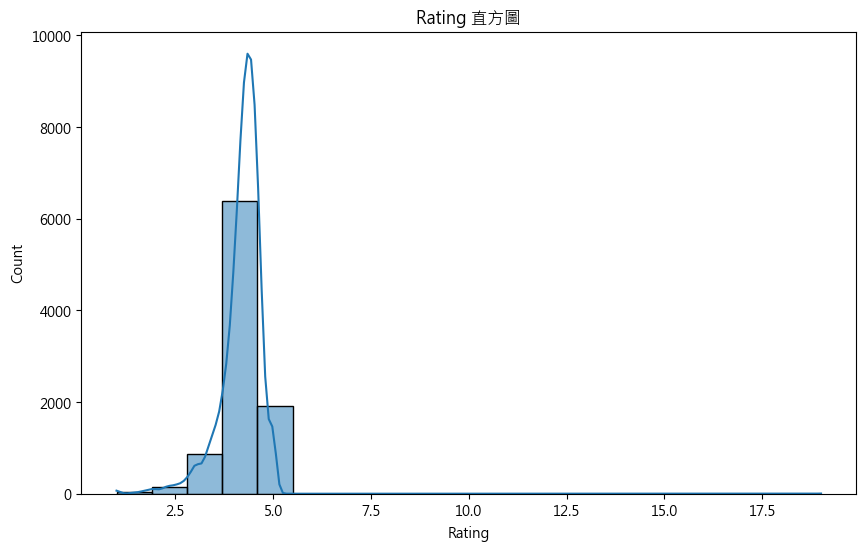

In [129]:
#繪製rating的箱型圖
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Rating')
plt.title('Rating 箱型圖')
plt.show()

#繪製rating的直方圖
plt.figure(figsize=(10, 6)) 
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating 直方圖')
plt.show()

## 2.2 資料貼標(Data Labeling)
我們發現資料集中有一些欄位是文字型態，例如: `Category`、`Type`、`Content Rating`、`Genres`，這些欄位是無法直接拿來進行建模的，因此我們需要將這些文字型態的欄位轉換成數值型態。
常見的方法有:
- `One-hot encoding`
- `Label encoding`

### 2.2.1 One-hot encoding
將類別型資料轉換成二元的特徵，例如類別 A 對應到 [1, 0, 0]、類別 B 對應到 [0, 1, 0] 等等。
適用於: 類別變數無序（如城市、顏色、國家等）
好處: 避免了類別之間的順序關係
缺點: 可能會造成維度爆炸，且計算成本高
 
### 2.2.2 Label encoding
將類別型資料轉換成數值型態，例如高成本對應到 0、低成本對應到 1 等等。
適用於: 類別變數有序（如成本高、中、低）
好處: 維度小，計算更高效
缺點: 可能會造成數值型態的欄位被誤認為有順序性

[參考資料](https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87)

In [130]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 創建 OneHotEncoder 實例
onehot_encoder = OneHotEncoder(sparse=False)  # 設定 sparse=False 讓結果以 array 顯示
encoded_data = onehot_encoder.fit_transform(df[['Type']])

# 取得 OneHotEncoder 編碼後的類別名稱
categories = onehot_encoder.get_feature_names_out(['Type'])

# 轉換為 DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=categories)

# 合併原始 df
df = pd.concat([df, df_encoded], axis=1)

print(df)



                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

c:\Users\SHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 2.3 缺失值處理（Handling Missing Values）
缺失值（Missing Values）可能會影響機器學習模型的準確性，甚至導致模型無法訓練。因此，在資料預處理的這個階段，我們需要找出缺失值，根據數據的性質與應用場景處理缺失值。

#### **處理缺失值的方法**

##### 1. 直接刪除
- **適用場景**：當缺失值數量過多（如超過 50%）且無法填補時。
- **缺點**：可能會導致數據量減少，影響模型效果。

```python
df.dropna(inplace=True)  # 刪除所有含缺失值的行
df.drop(columns=['Cabin'], inplace=True)  # 刪除特定缺失過多的欄位
```


##### 2. 用統計值填補
當缺失值較少時，可以使用數據的統計量（如**平均值、中位數或眾數**）來填補：
- **均值填補（Mean Imputation）**：適用於數值型變數，適合 **正態分佈** 的數據。
- **中位數填補（Median Imputation）**：適用於偏態分佈的數據，可避免極端值影響。
- **眾數填補（Mode Imputation）**：適用於類別型變數，如 `Category`、`Type`。

```python
from sklearn.impute import SimpleImputer

# 使用中位數填補 Rating 缺失值
imputer = SimpleImputer(strategy='median')
df['Rating'] = imputer.fit_transform(df[['Rating']])

# 使用眾數填補類別型變數（如 'Type'）
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
```


##### 3. 使用前後數據填補（Forward/Backward Fill）
這種方法適用於**時間序列數據**，可使用前一筆或後一筆數據填補。

```python
df.fillna(method='ffill', inplace=True)  # 使用前一筆資料填補
df.fillna(method='bfill', inplace=True)  # 使用後一筆資料填補
```


##### 4. 使用 KNN 插補（K-Nearest Neighbors Imputation）
KNN 插補利用相似數據來推測缺失值，適用於數據關聯性較強的情境。

```python
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)  # 使用 5 個鄰近樣本填補
df[['Rating', 'Reviews']] = knn_imputer.fit_transform(df[['Rating', 'Reviews']])
```

... 不認識KNN，這邊請>>>[點我](https://medium.com/@SCU.Datascientist/python%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-knn-k-nearest-neighbor-531a95336f71)

In [131]:
# 檢查缺失值
print(df.isnull().sum())



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Type_0               0
Type_Free            0
Type_Paid            0
Type_nan             0
dtype: int64


我這裡的判斷: 因為Rating 屬於 數值型變數，且評分可能受到極端值影響，因此使用中位數來填補，比均值更穩定。

In [132]:
#先以中位數填補Rating的缺失值
df['Rating'].fillna(df['Rating'].median(), inplace = True)
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
Type_0            0
Type_Free         0
Type_Paid         0
Type_nan          0
dtype: int64


C:\Users\SHI\AppData\Local\Temp\ipykernel_25264\1362985257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace = True)


再來，剩下有包含缺失值的列數極少，因此直接刪除即可，不會影響到資料太多。

In [133]:
#刪除有缺失值的列
df.dropna(inplace = True)

最後再用isnull()檢查是否還有缺失值。

In [134]:
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Type_0            0
Type_Free         0
Type_Paid         0
Type_nan          0
dtype: int64


### 2.4 異常值處理（Outliers Detection）
異常值指的是與其他數據相比 **明顯偏離** 的數據點，有可能是數據輸入錯誤、測量時發生問題，或是數據本身的特殊性。

處理異常值時，我們可以想想看:
1. **是否真的需要移除異常值？**（例如，金融詐欺檢測中的異常交易本身就是關鍵數據）
2. **異常值的來源是什麼？**（例如，技術錯誤導致的極端值 vs. 真正異常的商業行為）
3. **選擇適當的處理方法**，避免影響模型表現。

這邊舉兩個比較常見的處理方法: **IQR（四分位距）** 和 **Z-score 標準分數**。
##### IQR（四分位距, Interquartile Range
適用場景：數據偏態明顯，且存在長尾分佈的情況。

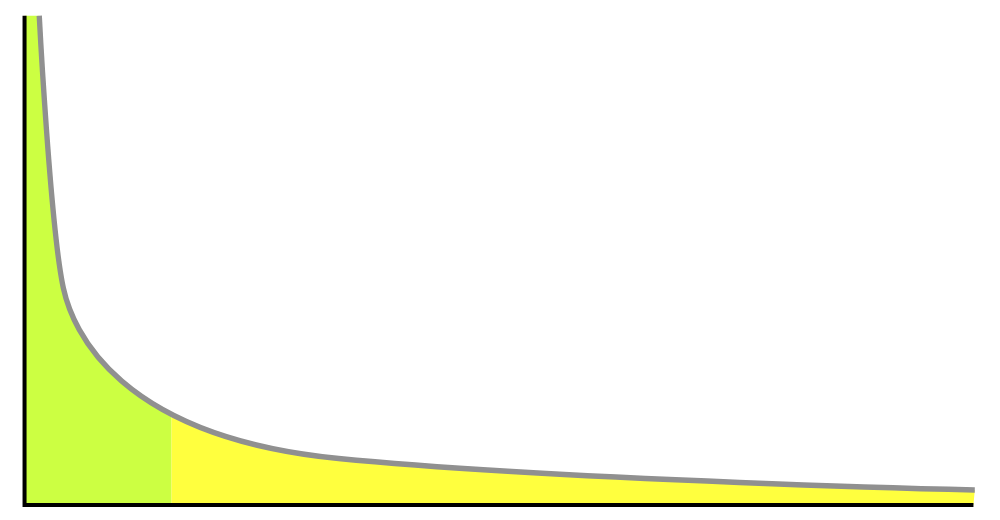

[參考來源](https://zh.wikipedia.org/zh-tw/%E9%95%BF%E5%B0%BE)

- 怎麼處理異常值?：
  - 取 Q1（25% 分位數）和 Q3（75% 分位數）
  - 計算四分位距（IQR）= Q3 - Q1
  - 設定異常值範圍：
    - **小於 Q1 - 1.5 * IQR**
    - **大於 Q3 + 1.5 * IQR**
  - 超出範圍的數據被視為異常值。

```python
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Reviews'] >= lower_bound) & (df['Reviews'] <= upper_bound)]
```

✅ **優點**：適用於非常態分佈，避免受極端值影響。  
❌ **缺點**：可能會錯誤刪除極端但有效的數據（如熱門應用程式評論數極高）。

---

##### Z-score 標準分數
**適用場景**：數據服從**常態分佈**，例如身高、體重、測驗分數。

- 怎麼處理異常值?：
  - 計算數據的 **Z-score**：
    - \( Z = \frac{x - \mu}{\sigma} \)
  - 超過 3 個標準差（即 `Z > 3` 或 `Z < -3`）的數據視為異常值。

```python
from scipy.stats import zscore

df = df[np.abs(zscore(df['Rating'])) < 3]
```

✅ **優點**：適用於常態分佈的數據，能有效識別極端值。  
❌ **缺點**：不適用於偏態分佈的數據，可能會誤刪重要資訊。

---

### Winsorization（截尾處理)
**適用場景**：當不想刪除異常值，但仍需減少極端值影響。

- 怎麼處理異常值? 將異常值替換為邊界值，而不是直接刪除：
  - 如果數據超過 `Q3 + 1.5 * IQR`，則設為 `Q3 + 1.5 * IQR`
  - 如果數據低於 `Q1 - 1.5 * IQR`，則設為 `Q1 - 1.5 * IQR`

```python
from scipy.stats.mstats import winsorize

df['Reviews'] = winsorize(df['Reviews'], limits=[0.05, 0.05])  # 限制上下 5% 的異常值
```

✅ **優點**：保留所有數據，適合需要完整數據的應用場景。  
❌ **缺點**：可能會降低模型對極端值的敏感度，影響某些應用（如詐欺檢測）。

In [135]:
# 檢查異常值
# 檢查 Rating 欄位
print(df['Rating'].value_counts().sort_index(ascending=False))


Rating
5.0     274
4.9      87
4.8     234
4.7     499
4.6     823
4.5    1037
4.4    1108
4.3    2545
4.2     951
4.1     707
4.0     567
3.9     386
3.8     303
3.7     239
3.6     174
3.5     163
3.4     128
3.3     102
3.2      63
3.1      69
3.0      83
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.4      19
2.3      20
2.2      14
2.1       8
2.0      12
1.9      13
1.8       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
1.0      16
Name: count, dtype: int64


In [136]:
# # 移除異常值
# from scipy.stats import zscore

# df = df[np.abs(zscore(df['Rating'])) < 3]
# print(df['Rating'].value_counts().sort_index(ascending=False))

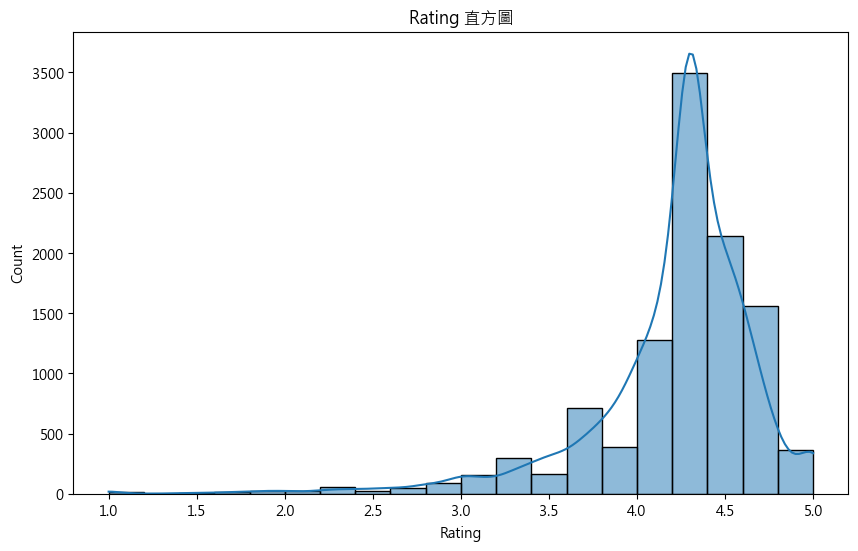

In [137]:
#畫直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating 直方圖')
plt.show()

### 補充: 如果圖形出現長尾分佈，可以怎麼處理?

- **對數轉換（Log Transformation）**：對數轉換可以將長尾分佈的數據轉換為近似正態分佈，減少極端值對模型的影響。
- **Box-Cox 轉換**：Box-Cox 轉換是一種廣義的幂轉換方法，可以根據數據的特性自動選擇最佳轉換參數。
- **分箱（Binning）**：將數據分為多個區間，可以減少極端值的影響，並提高模型的穩定性。

在這邊，我們就正式進入到特徵工程的環節了。

## 3. 特徵工程(Feature Engineering) 
### 特徵是什麼?
有多種方法可以將原始數據轉換為數值型的表示，因此**特徵可以有多種形式**。當然，特徵必須採用可用的數據類型。事實上，特徵還與模型相關，這一點可能並不那麼明顯。有些模型更適合使用某種類型的特徵，反之亦然。

#### **「正確的特徵應該適合當前的任務，並易於被模型所使用。」**
特徵工程就是在給定數據、模型和任務的情況下，設計出最合適的特徵的過程。

特徵的數量同樣非常重要。
如果沒有足夠具備訊息量的特徵，那麼模型將無法有效完成任務；反之，如果特徵過多，或者大部分特徵不合適，則模型將難以訓練，並且訓練成本高昂。在訓練過程中，可能會因為錯誤的特徵選擇導致模型性能下降。

*cited by 參考書目

### 特徵工程
特徵工程是一種將數據 `轉化成適合模型資料特徵` 的優化手段，以提高機器學習的結果品質。

特徵工程的常見手法包含特徵縮放、特徵轉換、特徵選擇和特徵提取等等。

### 3.1 特徵縮放（Feature Scaling）
特徵縮放是將數據的特徵值按比例縮放，使之落入一個特定的範圍，讓**數據維持在相同的尺度內**，避免某些變數的數值範圍過大而影響模型的學習。

#### **常見的特徵縮放方法**
1. **標準化（Standardization）**：將特徵值縮放為均值為 0，方差為 1 的分佈。

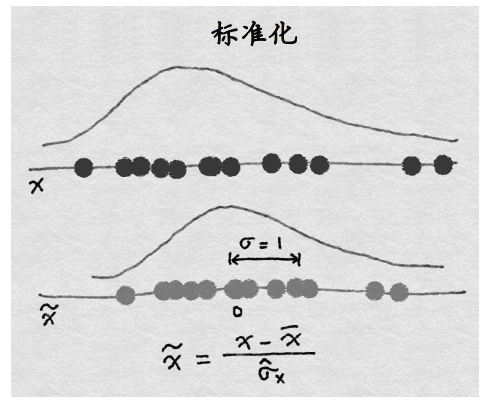


2. **最小-最大縮放（Min-Max Scaling）**：將特徵值縮放到一個固定範圍（通常是 0 到 1）。

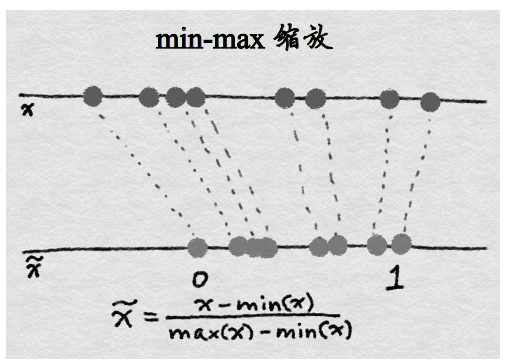


0        0.775
1        0.725
2        0.925
3        0.875
4        0.825
         ...  
10836    0.875
10837    1.000
10838    0.825
10839    0.875
10840    0.875
Name: Rating_new, Length: 10829, dtype: float64


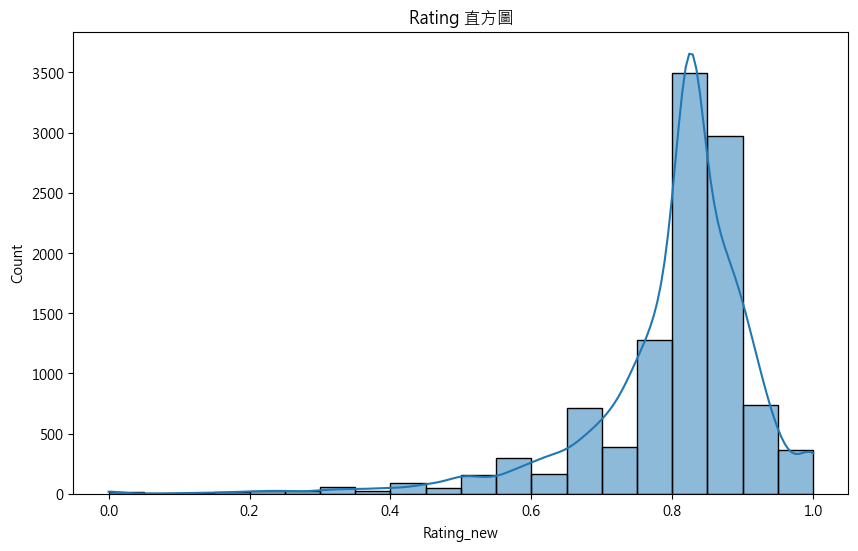

In [138]:
#將rating進行數據正規化
from sklearn.preprocessing import MinMaxScaler

# 創建 MinMaxScaler 實例
scaler = MinMaxScaler()

# 進行正規化
df['Rating_new'] = scaler.fit_transform(df[['Rating']])
print(df['Rating_new'])

#繪製rating的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating_new'], bins=20, kde=True)
plt.title('Rating 直方圖')
plt.show()

0       -0.221691
1       -0.637972
2        1.027151
3        0.610870
4        0.194590
           ...   
10836    0.610870
10837    1.651572
10838    0.194590
10839    0.610870
10840    0.610870
Name: Rating_new, Length: 10829, dtype: float64


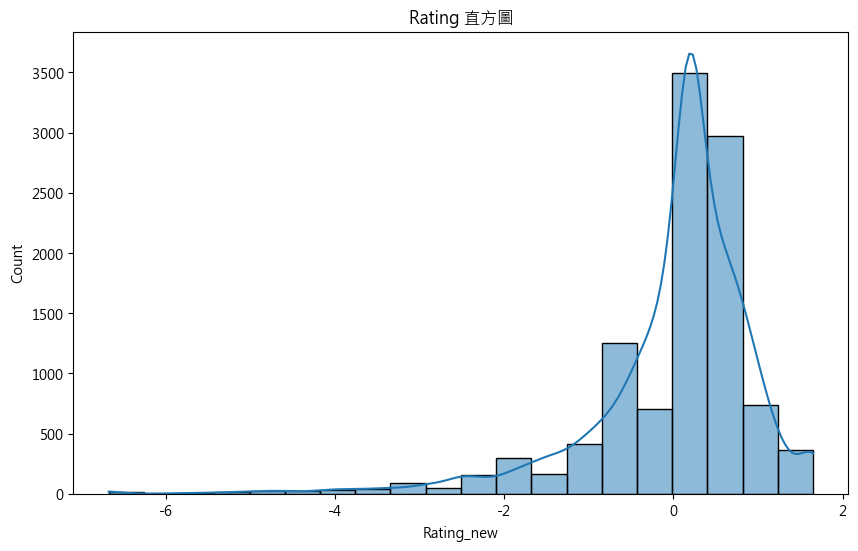

In [139]:
# 將rating 的數據進行標準化
from sklearn.preprocessing import StandardScaler

# 創建 StandardScaler 實例
scaler = StandardScaler()

# 標準化 Rating 欄位
df['Rating_new'] = scaler.fit_transform(df[['Rating']])
print(df['Rating_new'])

# 繪製標準化後的 Rating 直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating_new'], bins=20, kde=True)
plt.title('Rating 直方圖')
plt.show()


### 提問? 為什麼直方圖的圖形看似沒有改變?
縮放方法不會改變數據的分佈形狀，而只是調整數據的範圍或尺度。

如果要將數據轉換為正態分佈，可以使用對數轉換或 Box-Cox 轉換等方法。

0        1174.894852
1         947.704164
2        2135.286546
3        1762.536677
4        1444.547491
            ...     
10836    1762.536677
10837    2812.570350
10838    1444.547491
10839    1762.536677
10840    1762.536677
Name: Rating, Length: 10829, dtype: float64


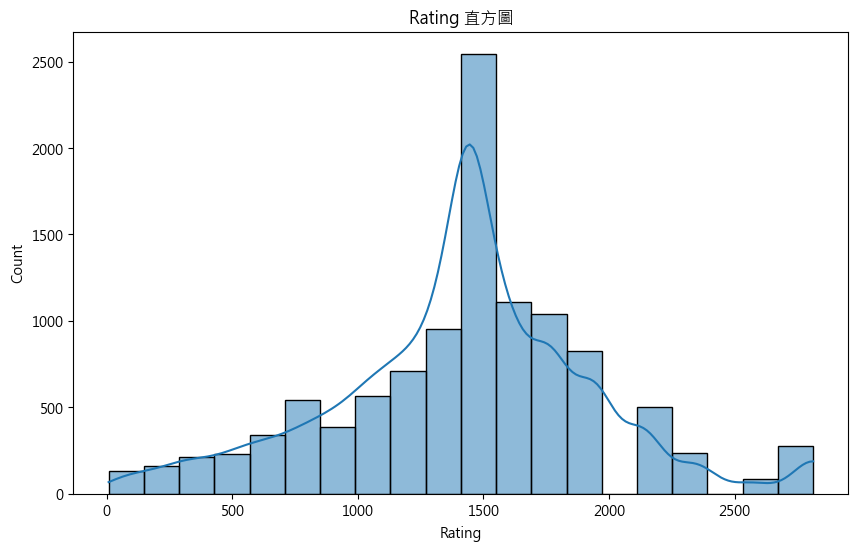

In [140]:
### 對rating作對數轉換
# 對 Rating 欄位進行box-cox轉換
from scipy.stats import boxcox

# 進行 box-cox 轉換
df['Rating'], _ = boxcox(df['Rating'] + 1)  # Rating 欄位有 0 值，所以 +1 避免出現錯誤
print(df['Rating'])

# 繪製 Rating 直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Rating 直方圖')
plt.show()

## 有空再說...
### 3.2 特徵選擇(Feature Selection)
特徵選擇的目標是`減少無用或冗餘的特徵`，從而降低模型的複雜度，在不影響預測準確度的情況下提升計算效率。

雖然某些特徵選擇方法可能會增加訓練時間，但它們的主要目的是 減少模型推理（評分）時間，並提升模型的可解釋性。

特徵選擇技術大致可分為 **三類**：**過濾法（Filter Methods）**、**打包法（Wrapper Methods）** 和 **嵌入式方法（Embedded Methods）**。  

#### 過濾法（Filter Methods)  
這類方法在建模之前，**獨立** 對每個特徵進行評估，並過濾掉與目標變數（Response Variable）**關聯性低** 的特徵。  

常見的過濾標準包括：
- **相關係數（Pearson correlation）**：計算數值特徵與目標變數的線性相關性。
- **卡方檢定（Chi-Square Test）**：用於類別變數，測試變數與目標變數的獨立性。
- **互信息（Mutual Information）**：衡量特徵與目標變數之間的信息增益。

**📌 優缺點**
✅ **計算成本低**，適用於大規模數據集  
❌ **不考慮模型的影響**，可能會刪除對特定模型有用的特徵

```python
from sklearn.feature_selection import SelectKBest, f_classif

# 選擇與目標變數關聯最強的前 10 個特徵
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# 顯示選出的特徵索引
selected_features = X.columns[selector.get_support()]
print(f"選出的特徵: {selected_features}")
```

---

## 打包法（Wrapper Methods)
**📌 原理**：  
這類方法會**測試不同的特徵組合**，找出對模型表現最好的特徵子集。  
主要技術包括：
- **遞迴特徵消除（RFE, Recursive Feature Elimination）**：遞迴地移除對模型影響最小的特徵。
- **前向/後向選擇（Forward/Backward Selection）**：根據模型評分遞增或遞減選擇特徵。

**📌 優缺點**
✅ **考慮特徵之間的互動**，避免錯刪有用特徵  
❌ **計算成本高**，適用於特徵較少的情況

**📌 例子（使用 RFE 進行特徵選擇）**
```python
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 建立基礎模型
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # 保留 10 個特徵
rfe.fit(X, y)

# 顯示選出的特徵
selected_features_rfe = X.columns[rfe.support_]
print(f"RFE 選出的特徵: {selected_features_rfe}")
```

#### 嵌入式方法（Embedded Methods）
嵌入式方法在**模型訓練時自動選擇特徵**，不需要額外的特徵選擇步驟。  
最常見的技術包括：
- **L1 正則化（Lasso Regression）**：自動將不重要的特徵權重壓縮為 0，進行特徵選擇。
- **決策樹（Decision Trees）**：在構建樹的過程中，自動選擇最重要的特徵。

**📌 優缺點**
✅ **計算成本適中**，適合大多數應用場景  
❌ **與特定模型綁定**，不一定適用於所有機器學習算法

**📌 例子（使用 Lasso 進行特徵選擇）**
```python
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)  # L1 正則化
lasso.fit(X, y)

# 選擇非零係數的特徵
selected_features_lasso = X.columns[lasso.coef_ != 0]
print(f"Lasso 選出的特徵: {selected_features_lasso}")
```
